In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

DATA_PATH = "/content/drive/MyDrive/Final_project/data/"
SEED = 42

In [3]:
reset_seeds(SEED)

In [4]:
df = pd.read_csv(f"{DATA_PATH}아모레크롤링_스킨케어.csv")
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...
...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~


In [5]:
# 제품별 평균 평점과 리뷰 수 계산
product_rating_avg = df.groupby('상품명')['별점'].mean()
product_rating_count = df.groupby('상품명').size()

In [6]:
product_rating_count.describe()

count    491.000000
mean     229.670061
std      237.347608
min        8.000000
25%       49.000000
50%      130.000000
75%      335.000000
max      932.000000
dtype: float64

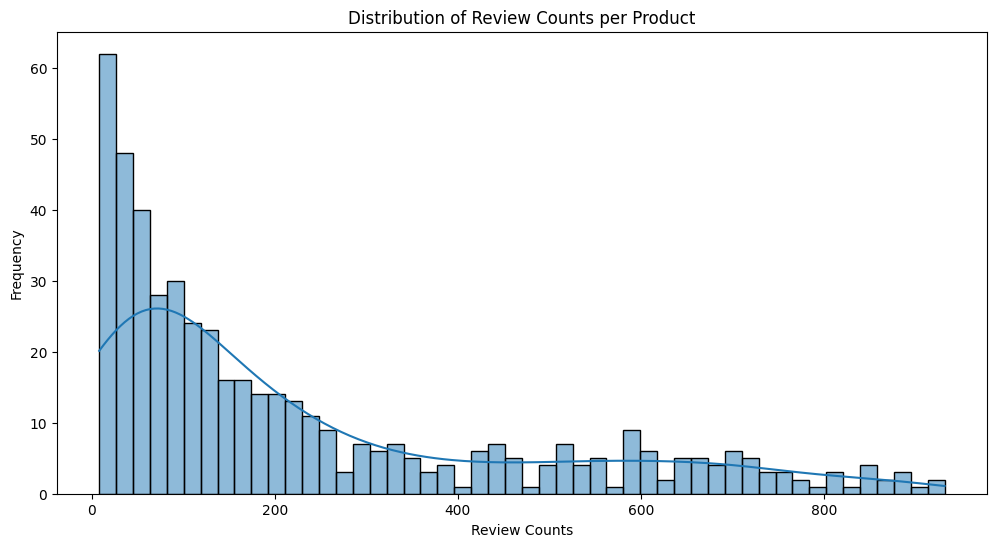

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 리뷰 수 분포 그래프 그리기
plt.figure(figsize=(12, 6))
sns.histplot(product_rating_count, bins=50, kde=True)
plt.title('Distribution of Review Counts per Product')
plt.xlabel('Review Counts')
plt.ylabel('Frequency')
plt.show()

In [7]:
# 가중 평점 계산
m = product_rating_count.quantile(0.6)
C = product_rating_avg.mean()
product_weighted_rating = (product_rating_count / (product_rating_count + m) * product_rating_avg) + (m / (product_rating_count + m) * C)

In [8]:
# 가중 평점을 데이터프레임에 추가
df['가중평점'] = df['상품명'].map(product_weighted_rating)
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...,4.764849
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...,4.764849
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...,4.764849
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...,4.764849
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...,4.764849
...,...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.,4.776748
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^,4.776748
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~,4.776748
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~,4.776748


In [9]:
# 가상 유저 생성
df['가상유저'] = df['나이'] + ',' + df['성별'] + ',' + df['피부타입'] + ',' + df['피부트러블']
df

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점,가상유저
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...,4.764849,"40대,여성,지성,모공"
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...,4.764849,"40대,여성,건성,건조함"
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...,4.764849,"20대,여성,복합성,트러블"
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...,4.764849,"30대,여성,건성,건조함"
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...,4.764849,"50대 이상,여성,지성,모공"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112763,스킨케어,프리메라,모이스처 클렌징 티슈 300g,drea****,5,2020.01.11,40대,여성,복합성,모공,자극적이지 않고 순하게 화장을 지워주어 좋아요.,4.776748,"40대,여성,복합성,모공"
112764,스킨케어,프리메라,모이스처 클렌징 티슈 300g,kim4***,5,2022.05.11,50대 이상,여성,복합성,칙칙함,순하고 화장도 잘지워지고 기름지지않아서 좋아요 ~~^^,4.776748,"50대 이상,여성,복합성,칙칙함"
112765,스킨케어,프리메라,모이스처 클렌징 티슈 300g,hyej*****,4,2022.04.12,40대,여성,수분부족지성,탄력없음,클렌징티슈는 이것만 사용해요 자극 덜하고 향도 좋아요~,4.776748,"40대,여성,수분부족지성,탄력없음"
112766,스킨케어,프리메라,모이스처 클렌징 티슈 300g,sooh*****,4,2019.08.31,40대,여성,수분부족지성,모공,제 인생템 중 하나입니다 없으면 불안해져 쟁여놓고 쓴답니다~,4.776748,"40대,여성,수분부족지성,모공"


In [10]:
# 각 가상 유저별 리뷰 수 계산
user_review_counts = df['가상유저'].value_counts()

# 기초 통계량 살펴보기
user_review_counts.describe()

count     386.000000
mean      292.145078
std       538.657986
min         1.000000
25%        20.000000
50%        92.000000
75%       251.750000
max      4045.000000
Name: 가상유저, dtype: float64

In [11]:
# 가상 유저와 상품명을 ID로 변환
user_to_id = {user: i for i, user in enumerate(df['가상유저'].unique())}
product_to_id = {product: j for j, product in enumerate(df['상품명'].unique())}
df['user_id'] = df['가상유저'].map(user_to_id)
df['product_id'] = df['상품명'].map(product_to_id)

In [22]:
# 가상유저별 총 구매횟수를 계산
user_total_purchase_count = df.groupby('가상유저').size().reset_index(name='총구매횟수')

# 구매횟수를 기반으로 10%씩 묶어 클래스를 생성
user_total_purchase_count['구매_클래스'] = pd.qcut(user_total_purchase_count['총구매횟수'], 10, labels=False)

# 원본 데이터에 구매 클래스 정보 추가
df = pd.merge(df, user_total_purchase_count[['가상유저', '구매_클래스']], on='가상유저', how='left')

df.head()

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점,가상유저,user_id,product_id,구매_클래스
0,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,0103*******,5,2022.09.27,40대,여성,지성,모공,남편이 극지성이에요. 원래 수퍼화산송이 미셀라만 꾸준히 사용해 오다가 지성 전용이라...,4.764849,"40대,여성,지성,모공",0,0,7
1,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,lsm2***,5,2022.08.15,40대,여성,건성,건조함,여름이라 집에 와서 메이크업 클렌징 해줄때 꼭 이중세안 해주는데 이 폼 클렌징으로 ...,4.764849,"40대,여성,건성,건조함",1,0,9
2,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,gpdl***,5,2022.12.24,20대,여성,복합성,트러블,이니스프리 폼클렌징은 피부에 자극적이지 않아 좋아요 선크림만 사용해도 꼭 폼까지 써...,4.764849,"20대,여성,복합성,트러블",2,0,9
3,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,zoll***,5,2022.09.30,30대,여성,건성,건조함,저희 엄마가 이 제품이 클렌징이 제일 잘된다고 좋아하서 1+1 이벤트하길래 4개 쟁...,4.764849,"30대,여성,건성,건조함",3,0,9
4,스킨케어,이니스프리,화산송이 모공 바하 클렌징 폼 150g,snow****,5,2022.09.30,50대 이상,여성,지성,모공,여름이라서 모공이 넓어지는것 같아서 구매해서 사용해보니 촉촉하고 피부땡기지 않아서 ...,4.764849,"50대 이상,여성,지성,모공",4,0,5


In [23]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size=0.2,random_state=SEED,stratify=df['구매_클래스'])
train_df.shape, test_df.shape

((90214, 16), (22554, 16))

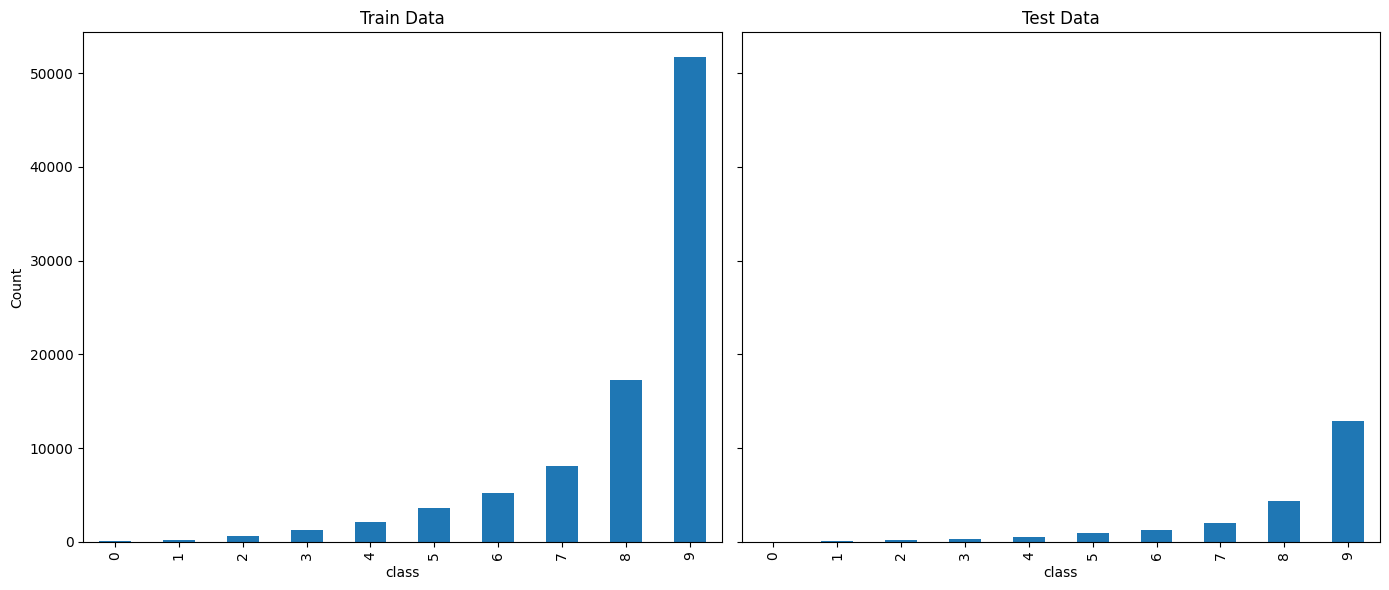

In [39]:
import matplotlib.pyplot as plt

# 학습 데이터와 테스트 데이터에서의 '구매_클래스' 분포를 그래프로 표현
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

train_df['구매_클래스'].value_counts().sort_index().plot(kind='bar', ax=axes[0], title='Train Data')
test_df['구매_클래스'].value_counts().sort_index().plot(kind='bar', ax=axes[1], title='Test Data')

axes[0].set_xlabel('class')
axes[0].set_ylabel('Count')
axes[1].set_xlabel('class')

plt.tight_layout()
plt.show()


In [24]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=2811599 sha256=1b7b3b6bdc64d6d47902931d0b1c52bfa227d96db2b0069ab2e29f34557d4b55
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [37]:
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import PredefinedKFold

# Reader 객체 생성
reader = Reader(rating_scale=(0, 5))

# 학습 데이터와 테스트 데이터를 surprise의 데이터 형식으로 변환
train_data_surprise = Dataset.load_from_df(train_df[['user_id', 'product_id', '가중평점']], reader)
trainset = train_data_surprise.build_full_trainset()

# 테스트 데이터를 surprise의 데이터 형식으로 변환
testset = [(row['user_id'], row['product_id'], row['가중평점']) for i, row in test_df.iterrows()]

# SVD 알고리즘 사용하여 모델 학습
model = SVD(random_state=SEED)
model.fit(trainset)

# 테스트 데이터에 대한 예측
predictions = model.test(testset)

# 평가 (RMSE)
rmse = accuracy.rmse(predictions)

RMSE: 0.0189


In [14]:
df[['user_id', 'product_id', '가중평점']]

,user_id,product_id,가중평점
0,0,0,4.764849
1,1,0,4.764849
2,2,0,4.764849
3,3,0,4.764849
4,4,0,4.764849
...,...,...,...
112763,11,490,4.776748
112764,62,490,4.776748
112765,32,490,4.776748
112766,35,490,4.776748


In [ ]:
SVD?

In [15]:
id_to_user = {v: k for k, v in user_to_id.items()}
id_to_product = {v: k for k, v in product_to_id.items()}

def get_top_n_recommendations(predictions, n=10):
    top_n = {}
    for uid, iid, est in predictions:
        user_info = id_to_user[uid]
        product_name = id_to_product[iid]
        top_n.setdefault(user_info, []).append((product_name, est))

    for user_info, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_info] = user_ratings[:n]

    return top_n

# user_recommendations = get_top_n_recommendations(predictions, n=5)

In [16]:
def get_unrated_items(user, df):
    # 사용자가 평가한 아이템들
    rated_items = set(df[df['가상유저'] == user]['상품명'].tolist())
    # 전체 아이템들
    all_items = set(df['상품명'].tolist())
    # 평가하지 않은 아이템들
    unrated_items = all_items - rated_items
    return unrated_items

In [17]:
from itertools import product

# 모든 (사용자, 아이템) 조합 생성
all_user_ids = list(user_to_id.values())
all_item_ids = list(product_to_id.values())
all_user_item_pairs = list(product(all_user_ids, all_item_ids))

# 모든 (사용자, 아이템) 조합과 임의의 평점(0)으로 새로운 리스트 생성
all_user_item_pairs_with_dummy_rating = [(uid, iid, 0) for (uid, iid) in all_user_item_pairs]

# 모든 (사용자, 아이템) 조합에 대한 예측 생성
all_predictions = model.test(all_user_item_pairs_with_dummy_rating)


# 사용자가 평가하지 않은 아이템에 대한 예측만 선택
filtered_predictions = []
for uid, iid, true_r, est, _ in tqdm(all_predictions):
    user_info = id_to_user[uid]
    product_name = id_to_product[iid]
    if product_name not in get_unrated_items(user_info, df):
        continue
    filtered_predictions.append((uid, iid, est))

  0%|          | 0/189526 [00:00<?, ?it/s]

In [ ]:
# 예측 평점이 높은 상위 N개의 아이템 추천
user_recommendations_unrated = get_top_n_recommendations(filtered_predictions, n=5)

In [ ]:
# 데이터 save
import pickle

with open('user_recommendations_unrated.pkl','wb') as f:
    pickle.dump(user_recommendations_unrated,f)

In [ ]:
# 데이터 불러오기
import pickle

with open('user_recommendations_unrated.pkl','rb') as f:
    user_recommendations_unrated = pickle.load(f)

In [ ]:
user_recommendations_unrated

{'40대,여성,지성,모공': [('테라크네365 수딩 액티브 모이스처라이저 60ml', 4.905463959983844),
  ('진설크림 60ml', 4.899571780506595),
  ('에이시카 365패드 60매 100ml * 2', 4.88692213287831),
  ('엘리멘탈 스무딩 로션 110ml', 4.885281787338219),
  ('아토베리어365 크림 더블기획세트', 4.883597684856168)],
 '40대,여성,건성,건조함': [('진설크림 60ml', 4.844191438842482),
  ('보태니컬 에센셜 2종 세트', 4.834805404547669),
  ('본윤 데일리 루틴', 4.832718721797715),
  ('테라크네365 클리어 딥 클렌징 폼 200g', 4.813310978239548),
  ('자음생세럼 브라이트닝 단품세트 50ml', 4.812978478188941)],
 '20대,여성,복합성,트러블': [('진설아이크림 25ml', 4.852947761557178),
  ('모이스춰 플럼핑 넥타 크림 30ml', 4.850030511292576),
  ('본윤선크림 단품세트 SPF50+/PA++++ 50ml', 4.843843535024149),
  ('극진 아이크림 기획세트 30ml', 4.843402643423228),
  ('순행클렌징오일 200ml', 4.843142897792825)],
 '30대,여성,건성,건조함': [('자음생세럼 단품세트 50ml', 4.834550612691441),
  ('자음생마스크EX 5매', 4.830811799543943),
  ('궁중비누 레귤러세트 100*2', 4.814592928862503),
  ('진설수 125ml', 4.813976789705895),
  ('레티놀 시카 흔적 앰플 50ml', 4.813786244985158)],
 '50대 이상,여성,지성,모공': [('하이드로-듀 플럼핑 크림 50ml', 4.98051758780049

In [ ]:
def content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=5, weight=0.1):
    # 사용자 정보와 일치하는 리뷰 데이터 필터링
    filtered_df = df[(df['나이'] == age) & (df['성별'] == gender) &
                     (df['피부타입'] == skin_type) & (df['피부트러블'] == skin_trouble)]

    # 상품별 평균 별점 계산
    product_rating_avg = filtered_df.groupby('상품명')['별점'].mean().reset_index()

    # 가중치 적용: 일치하는 특성이 있을 경우, 가중치를 더한다.
    feature_values = {'나이': age, '성별': gender, '피부타입': skin_type, '피부트러블': skin_trouble}
    for feature, feature_value in feature_values.items():
        feature_weight = filtered_df[filtered_df[feature] == feature_value].groupby('상품명')['별점'].count() * weight
        product_rating_avg = pd.merge(product_rating_avg, feature_weight.reset_index().rename(columns={'별점': f'{feature}_weight'}), on='상품명', how='left')

    # 최종 점수 계산 (평균 별점 + 가중치 합)
    product_rating_avg['final_score'] = product_rating_avg['별점'] + product_rating_avg[[f'{feature}_weight' for feature in ['나이', '성별', '피부타입', '피부트러블']]].sum(axis=1)

    # 최종 점수가 높은 상위 N개의 상품 추천
    recommended_products = product_rating_avg.sort_values(by='final_score', ascending=False).head(top_n)['상품명'].tolist()

    return recommended_products

# 테스트: 20대, 여성, 지성, 모공에 해당하는 사용자에게 상품 추천
content_based_recommendation_with_weights('20대', '여성', '지성', '모공')

['알로에 리바이탈 수딩젤 300ml',
 '센텔라 트러블 토너 250ml',
 '히알루론 모이스춰 수분크림 100ml',
 '로즈+PHA 리퀴드 마스크 80ml',
 '플라워 앰플 마스크팩 1매']

# 가중치 학습

In [ ]:
# LGBM Regressor를 이용한 가중치 학습
from sklearn.preprocessing import OneHotEncoder
from lightgbm import LGBMRegressor

# 원-핫 인코딩
encoder = OneHotEncoder(handle_unknown='ignore')
X = encoder.fit_transform(df[['나이', '성별', '피부타입', '피부트러블']])
y = df['가중평점']

# LGBM Regressor 모델 학습
lgbm_model = LGBMRegressor(random_state=SEED)
lgbm_model.fit(X, y)

# 가중치 추출
feature_weights = lgbm_model.feature_importances_

# 원-핫 인코딩된 특성 이름
feature_names = encoder.get_feature_names_out(['나이', '성별', '피부타입', '피부트러블'])

# 각 원래 범주형 변수에 대한 가중치 계산 (평균)
feature_names_series = pd.Series(feature_names)
age_weight = np.mean(feature_weights[feature_names_series.str.startswith('나이')])
gender_weight = np.mean(feature_weights[feature_names_series.str.startswith('성별')])
skin_type_weight = np.mean(feature_weights[feature_names_series.str.startswith('피부타입')])
skin_trouble_weight = np.mean(feature_weights[feature_names_series.str.startswith('피부트러블')])

age_weight, gender_weight, skin_type_weight, skin_trouble_weight

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 40
[LightGBM] [Info] Number of data points in the train set: 112768, number of used features: 20
[LightGBM] [Info] Start training from score 4.775038


(165.8, 240.0, 178.66666666666666, 77.375)

In [ ]:
# 가중치 정규화
total_weight = age_weight + gender_weight + skin_type_weight + skin_trouble_weight

normalized_age_weight = age_weight / total_weight
normalized_gender_weight = gender_weight / total_weight
normalized_skin_type_weight = skin_type_weight / total_weight
normalized_skin_trouble_weight = skin_trouble_weight / total_weight

normalized_age_weight, normalized_gender_weight, normalized_skin_type_weight, normalized_skin_trouble_weight

(0.2505130884778585,
 0.3626244947809773,
 0.26995379055917196,
 0.11690862618199216)

In [ ]:
# 가중치 설정
age_weight = normalized_age_weight
gender_weight = normalized_gender_weight
skin_type_weight = normalized_skin_type_weight
skin_trouble_weight = normalized_skin_trouble_weight

# 컨텐츠 기반 추천 함수 (특성 가중치 반영 및 사용하지 않은 상품만 추천)
def content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=5):
    user_specific_df = df.copy()

    # 가중치 적용
    user_specific_df['weighted_score'] = 0
    user_specific_df.loc[user_specific_df['나이'] == age, 'weighted_score'] += age_weight
    user_specific_df.loc[user_specific_df['성별'] == gender, 'weighted_score'] += gender_weight
    user_specific_df.loc[user_specific_df['피부타입'] == skin_type, 'weighted_score'] += skin_type_weight
    user_specific_df.loc[user_specific_df['피부트러블'] == skin_trouble, 'weighted_score'] += skin_trouble_weight

    # 가중 평점 계산
    user_specific_df['weighted_rating'] = user_specific_df['가중평점'] * (1 + user_specific_df['weighted_score'])

    # 사용자가 이미 평가한 상품 제거
    virtual_user = f"{age},{gender},{skin_type},{skin_trouble}"
    rated_items = set(df[df['가상유저'] == virtual_user]['상품명'].tolist())
    user_specific_df = user_specific_df[~user_specific_df['상품명'].isin(rated_items)]

    # 상품 추천
    weighted_recommendations = user_specific_df.groupby('상품명')['weighted_rating'].mean().sort_values(ascending=False).head(top_n)
    recommended_products = weighted_recommendations.index.tolist()

    return recommended_products

content_based_recommendation_with_weights('10대', '남성', '복합성', '모공')

['베이킹 파우더 모공 클렌징폼 160g*2',
 '파워부스팅 스페셜세트 2종',
 '베리어 B 에센스 라이트 35ml',
 '타임 레스폰스 스킨 리저브 젤 크림 50ml',
 '베스트셀러 컬렉션']

In [ ]:
df[df["가상유저"] == "10대,남성,복합성,모공"]

,상품분류,브랜드명,상품명,사용자 이름,별점,리뷰작성날짜,나이,성별,피부타입,피부트러블,리뷰,가중평점,가상유저,user_id,product_id


In [ ]:
def recommend_products_for_user(age, gender, skin_type, skin_trouble, top_n=5):
    # 가상 유저 ID를 생성
    virtual_user = f"{age},{gender},{skin_type},{skin_trouble}"

    # 가상 유저의 리뷰 수 확인
    user_review_count = df[df['가상유저'] == virtual_user].shape[0]

    # 가상유저별 총 구매횟수를 계산
    user_total_purchase_count = df.groupby('가상유저').size().reset_index(name='총구매횟수')

    # 구매횟수 상위 20%에 해당하는 임계값을 계산
    heavy_user_threshold = user_total_purchase_count['총구매횟수'].quantile(0.8)

    # 리뷰 수 상위 20% 이하인 경우 라이트 유저로 판단
    if user_review_count <= heavy_user_threshold:
        return content_based_recommendation_with_weights(age, gender, skin_type, skin_trouble, top_n=top_n)
    else:
        user_id = user_to_id[virtual_user]
        # CF 기반 추천 수행
        user_recommendations = user_recommendations_unrated.get(virtual_user, [])
        recommended_products = [product_name for product_name, _ in user_recommendations[:top_n]]
        return recommended_products

# 테스트: 20대, 여성, 지성, 모공에 해당하는 사용자에게 상품 추천
recommend_products_for_user('20대', '여성', '지성', '모공')

In [ ]:
from surprise import Dataset, Reader, SVD

reader = Reader(rating_scale=(formatted_data['구매횟수'].min(), formatted_data['구매횟수'].max()))
data_surprise = Dataset.load_from_df(formatted_data, reader)

trainset = data_surprise.build_full_trainset()

model = SVD()
model.fit(trainset)

In [ ]:
def get_top_n_recommendations(trainset, model, n=10):
    top_n = {}
    for uid in trainset.all_users():
        user_info = id_to_user[uid]
        user_ratings = []
        for iid in trainset.all_items():
            product_name = id_to_product[iid]
            est = model.predict(uid, iid).est
            user_ratings.append((product_name, est))
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[user_info] = user_ratings[:n]

    return top_n

user_recommendations = get_top_n_recommendations(trainset, model, n=5)

In [ ]:
user_recommendations.get('10대,남성,건성,민감성')

[('UV프로텍터 톤업 SPF50+/PA++++ 50ml', 5.674192363141247),
 ('오가니언스 워터리 에센스 230ml', 5.355801538460989),
 ('자음생아이크림 20ml', 5.0577827856281665),
 ('바하 버블 필링 클렌저 200ml', 5.052454047081319),
 ('퍼펙트 오일 투 폼 클렌저 200ml', 5.015420438344756)]

In [ ]:
user_recommendations

{'10대,남성,건성,건조함': [('상백크림 단품세트 50ml', 2.472808172903253),
  ('알파인베리 워터리 크림 100ml', 2.4379615665075427),
  ('나의 첫 설화수', 2.370891259902918),
  ('에이시카 365 흔적 진정 세럼 40ml', 2.350302189787529),
  ('테라크네365 하이드레이션 토너 세트 320ml', 2.2868829816776763)],
 '10대,남성,건성,민감성': [('레티놀 슈퍼 바운스 세럼 50ml', 2.327158360804458),
  ('부들밤x크렘드마롱 듀오 선물세트', 2.273850999923978),
  ('상백크림 단품세트 50ml', 2.20337248916535),
  ('로즈+PHA 리퀴드 마스크 80ml', 2.197424795481297),
  ('워터뱅크 블루 히알루로닉 크림 지·복합용 50ml', 2.1807282319893915)],
 '10대,남성,건성,탄력없음': [('에이시카 365 흔적 진정 세럼 40ml', 2.558481375677859),
  ('워터뱅크 블루 히알루로닉 세럼 50ml', 2.3499099216171664),
  ('부들밤x크렘드마롱 듀오 선물세트', 2.347578278093417),
  ('맨 바이오 안티에이징 2종 세트', 2.34346409090068),
  ('알파인베리 워터리 크림 100ml', 2.291274208217525)],
 '10대,남성,복합성,민감성': [('UV프로텍터 멀티디펜스 프레쉬 SPF50+/PA++++ 50ml', 2.57332784502226),
  ('나의 첫 설화수', 2.3815874074564487),
  ('알파인베리 워터리 크림 100ml', 2.3579092997776256),
  ('씨드 앤 스프라우트 에너지 마스크_로터스 세트 30매', 2.3515082566657712),
  ('워터뱅크 블루 히알루로닉 세럼 50ml', 2.332099722277